In [105]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('/Users/tarakram/Documents/Tour&Travels Customer Churn Prediction/data/Customertravel.csv')
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [3]:
data.shape

(954, 7)

In [4]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


## EDA

In [6]:
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [65]:
100*data['Target'].value_counts()/len(data['Target'])

0    76.519916
1    23.480084
Name: Target, dtype: float64

In [66]:
# We can see that Our Data is imbalanced, having 76% of No Churn and 23% churn.

In [7]:
# lets plot some Graphs to Understand the data.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

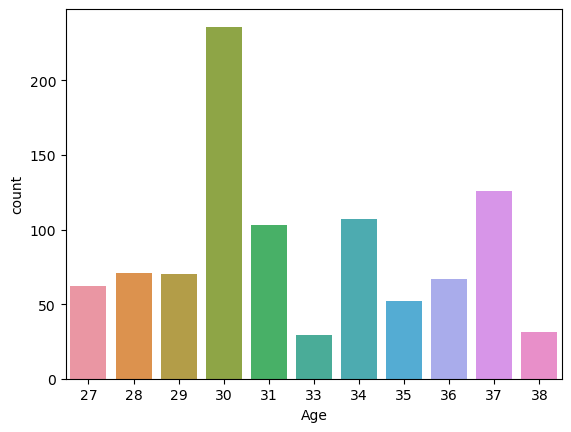

In [9]:
sns.countplot(data = data, x = 'Age')
plt.show()

In [10]:
# we can see that The most Travelers are of age 30 and 37.

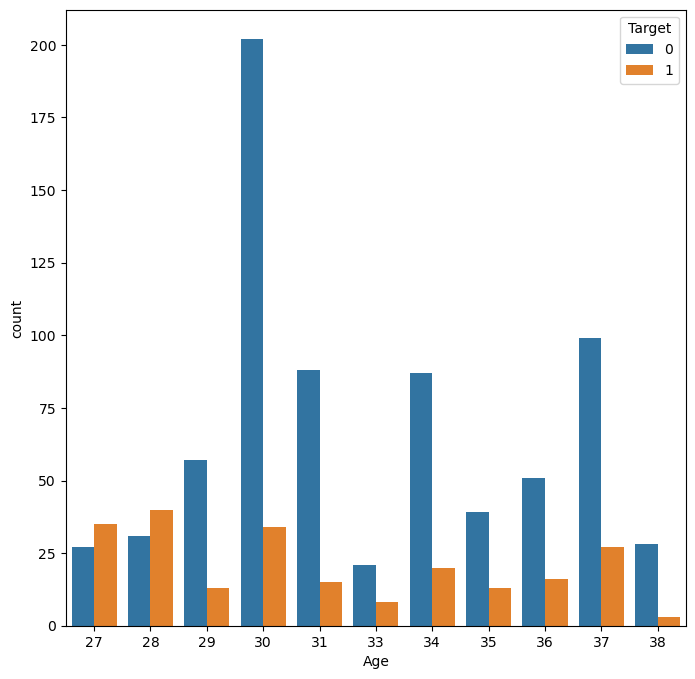

In [11]:
# plotting the countplot Age Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='Age',hue='Target',data=data)
plt.show()

In [12]:
# WE can see that the age of 27 and 28 have the high Churn rate, when compared to others.

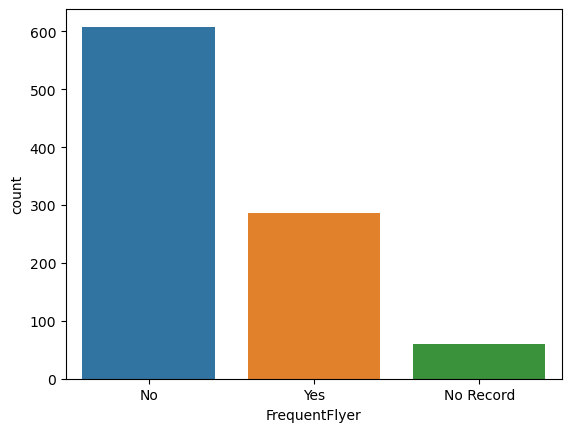

In [13]:
sns.countplot(data = data, x = 'FrequentFlyer')
plt.show()

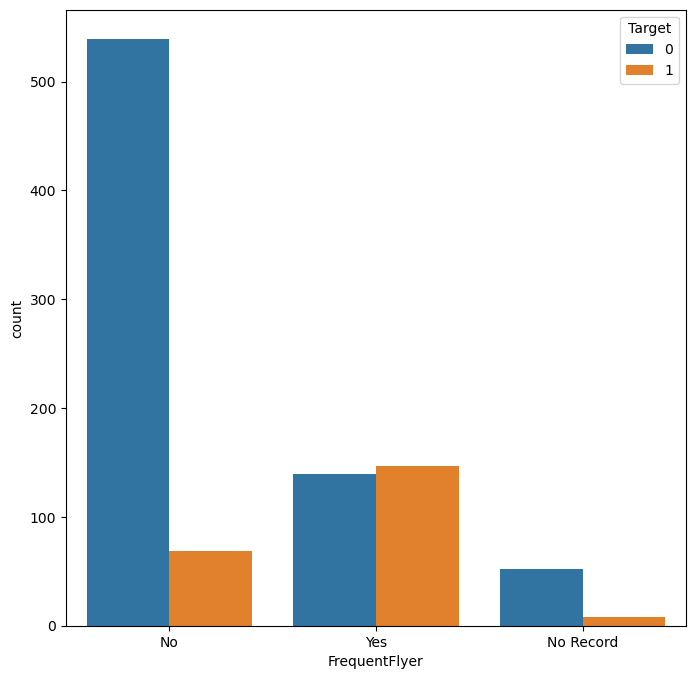

In [14]:
# plotting the countplot Frequentflyer Vs Target

plt.figure(figsize=(8,8))
sns.countplot(x='FrequentFlyer',hue='Target',data=data)
plt.show()

In [15]:
# We can see that The frequent flyer has the Highest Churn Rate.

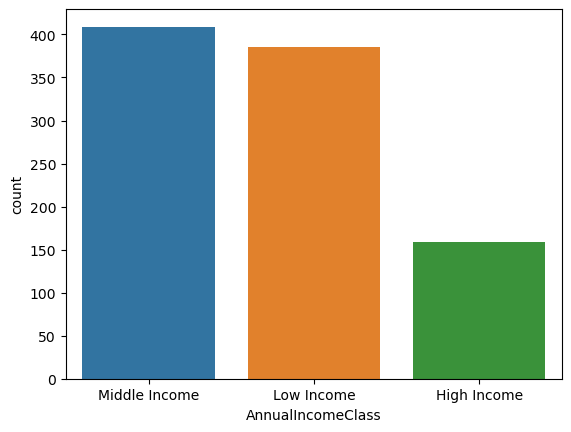

In [16]:
sns.countplot(data = data, x = 'AnnualIncomeClass')
plt.show()

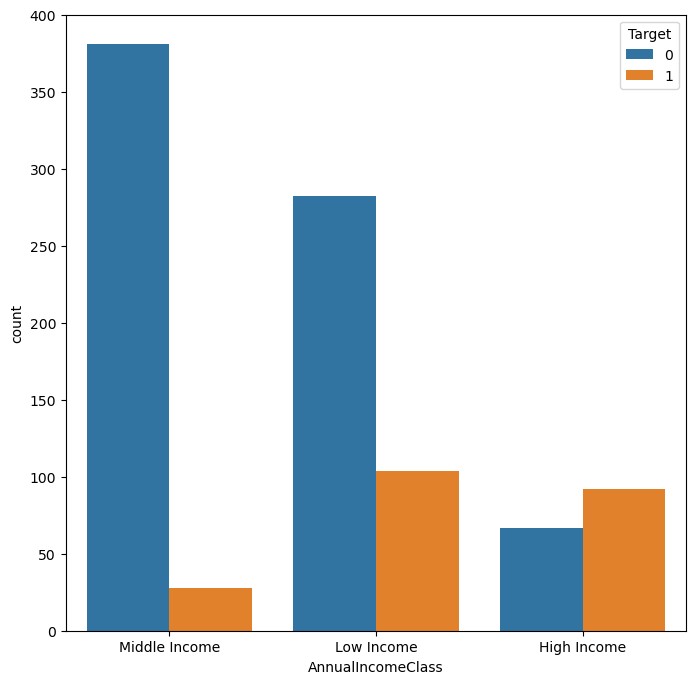

In [17]:
# plotting the countplot Accountsyncedtosocialmedia Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='AnnualIncomeClass',hue='Target',data=data)
plt.show()

In [18]:
# We can see that High Income are Having high Churn Rate, Bacause they have money so they try newplaces everytime.

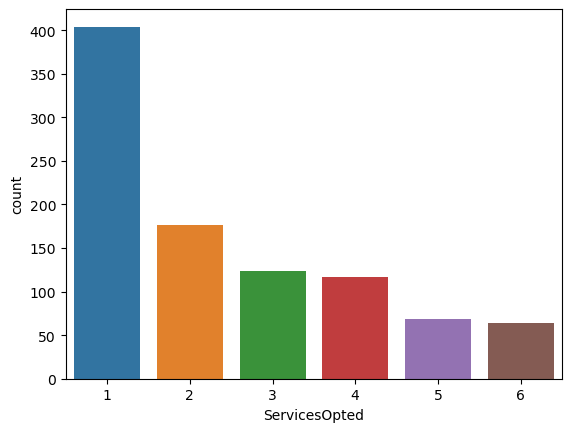

In [19]:
sns.countplot(data = data, x = 'ServicesOpted')
plt.show()

In [20]:
# Most of the people who travels have opted 1 or 2.

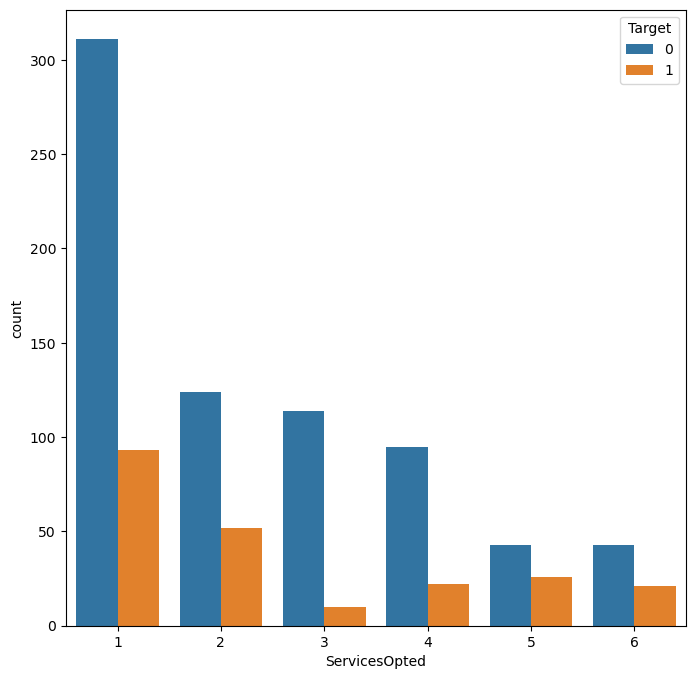

In [21]:
# plotting the countplot Serviesopted Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='ServicesOpted',hue='Target',data=data)
plt.show()

In [22]:
# Having the 2,5,6 services have high Churn Rate, when compared to others.

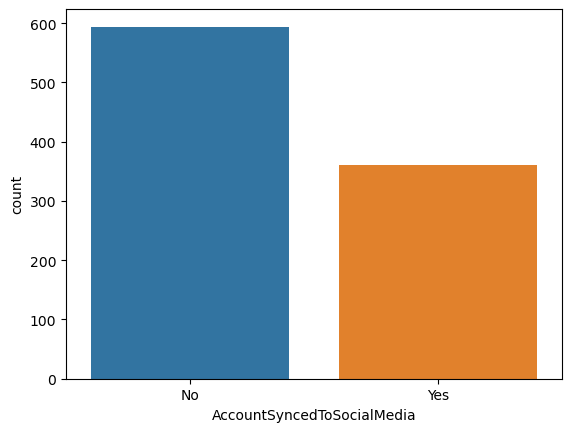

In [23]:
sns.countplot(data = data, x = 'AccountSyncedToSocialMedia')
plt.show()

In [24]:
# There are more people that Account that is not synced to the social media.

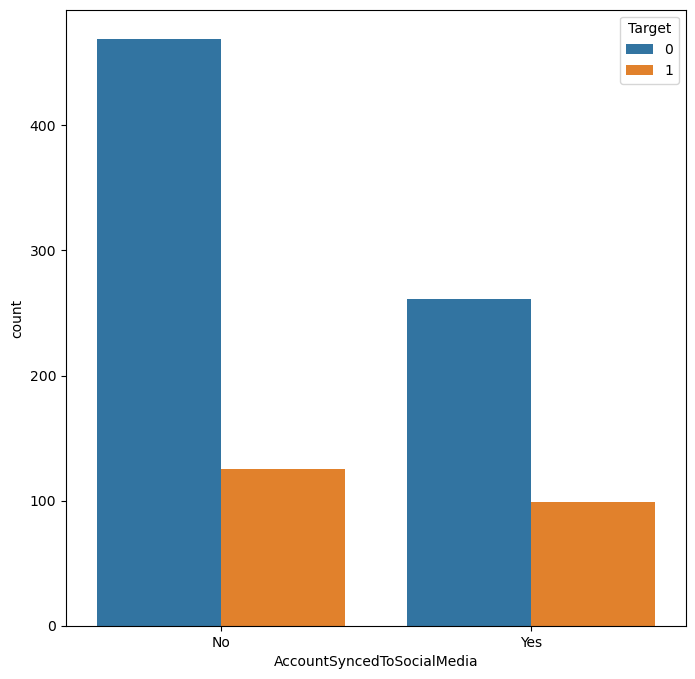

In [25]:
# plotting the countplot Accountsyncedtosocialmedia Vs Target
plt.figure(figsize=(8,8))
sns.countplot(x='AccountSyncedToSocialMedia',hue='Target',data=data)
plt.show()

In [26]:
# we can see that the accounts that are synced to social media have the High churn Rate.

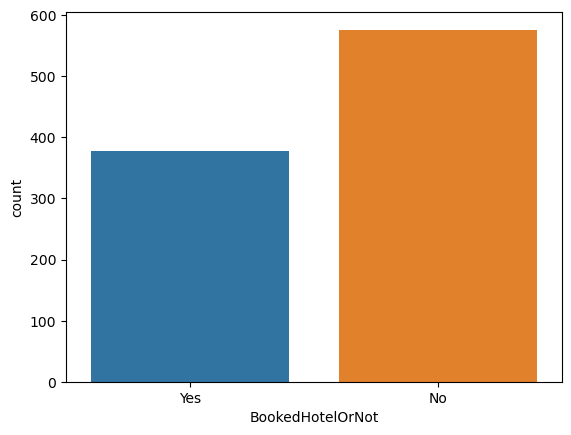

In [27]:
sns.countplot(data = data, x = 'BookedHotelOrNot')
plt.show()

In [28]:
# There are people who didn't book the hotel while they travelling.

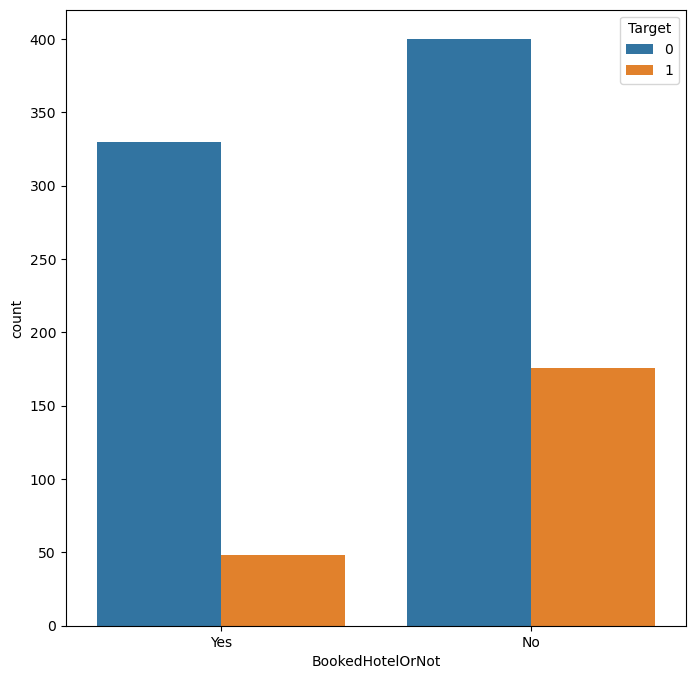

In [29]:
plt.figure(figsize=(8,8))
sns.countplot(x='BookedHotelOrNot',hue='Target',data=data)
plt.show()

In [30]:
# The people who didn't book the hotel have the high churn rate.

## Data Pre-Processing.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [32]:
# There are some of the objects so we have to make them numeric, Machines can understand only numbers.

In [37]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [33]:
data['FrequentFlyer'].value_counts()

No           608
Yes          286
No Record     60
Name: FrequentFlyer, dtype: int64

In [ ]:
# Here we cannot use Label Encoder, so we use pd.get_dummies method

In [34]:
data['AnnualIncomeClass'].value_counts()

Middle Income    409
Low Income       386
High Income      159
Name: AnnualIncomeClass, dtype: int64

In [ ]:
# Here we cannot use Label Encoder, so we use pd.get_dummies method

In [35]:
data['AccountSyncedToSocialMedia'].value_counts()

No     594
Yes    360
Name: AccountSyncedToSocialMedia, dtype: int64

In [ ]:
# Here, we can use Label Encoder, Because we have two variables.

In [38]:
data['AccountSyncedToSocialMedia'] = lb.fit_transform(data['AccountSyncedToSocialMedia'])

In [39]:
data['AccountSyncedToSocialMedia'].value_counts()

0    594
1    360
Name: AccountSyncedToSocialMedia, dtype: int64

In [36]:
data['BookedHotelOrNot'].value_counts()

No     576
Yes    378
Name: BookedHotelOrNot, dtype: int64

In [ ]:
# Here, we can use Label Encoder, Because we have two variables.

In [40]:
data['BookedHotelOrNot'] = lb.fit_transform(data['BookedHotelOrNot'])

In [41]:
data['BookedHotelOrNot'].value_counts()

0    576
1    378
Name: BookedHotelOrNot, dtype: int64

In [42]:
data = pd.get_dummies(data, columns = ['FrequentFlyer','AnnualIncomeClass'])

In [43]:
data.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,0,1,0,0,0,0,1
1,34,5,1,0,1,0,0,1,0,1,0
2,37,3,1,0,0,1,0,0,0,0,1
3,30,2,0,0,0,1,0,0,0,0,1
4,30,1,0,0,0,1,0,0,0,1,0


In [44]:
data.isnull().sum()

Age                                0
ServicesOpted                      0
AccountSyncedToSocialMedia         0
BookedHotelOrNot                   0
Target                             0
FrequentFlyer_No                   0
FrequentFlyer_No Record            0
FrequentFlyer_Yes                  0
AnnualIncomeClass_High Income      0
AnnualIncomeClass_Low Income       0
AnnualIncomeClass_Middle Income    0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Age                              954 non-null    int64
 1   ServicesOpted                    954 non-null    int64
 2   AccountSyncedToSocialMedia       954 non-null    int64
 3   BookedHotelOrNot                 954 non-null    int64
 4   Target                           954 non-null    int64
 5   FrequentFlyer_No                 954 non-null    uint8
 6   FrequentFlyer_No Record          954 non-null    uint8
 7   FrequentFlyer_Yes                954 non-null    uint8
 8   AnnualIncomeClass_High Income    954 non-null    uint8
 9   AnnualIncomeClass_Low Income     954 non-null    uint8
 10  AnnualIncomeClass_Middle Income  954 non-null    uint8
dtypes: int64(5), uint8(6)
memory usage: 43.0 KB


<Axes: >

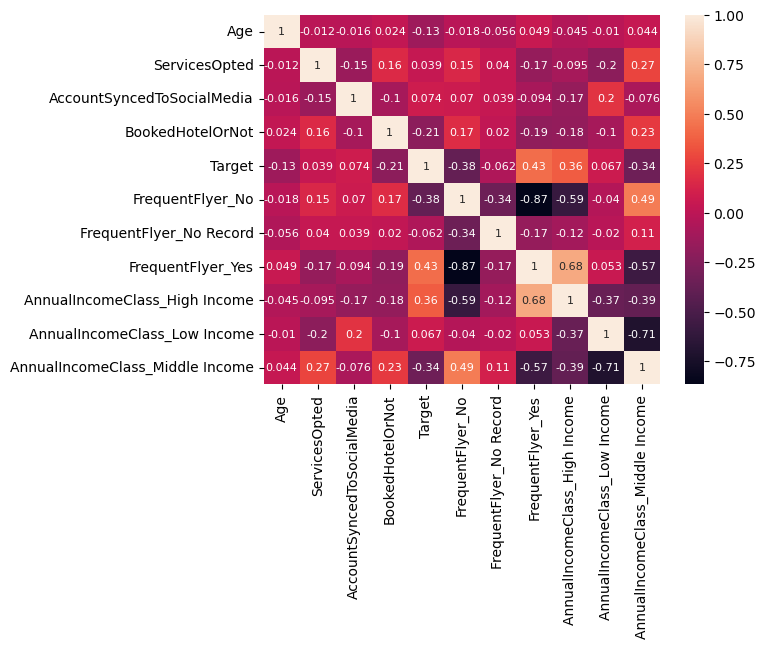

In [140]:
sns.heatmap(data.corr(), annot = True,annot_kws= {'fontsize':8})

In [141]:
# Dataset Looks Good, and ready for Model Building.

## Splitting the data

In [46]:
X = data.drop('Target', axis = 1)
y = data['Target']

In [47]:
X.columns

Index(['Age', 'ServicesOpted', 'AccountSyncedToSocialMedia',
       'BookedHotelOrNot', 'FrequentFlyer_No', 'FrequentFlyer_No Record',
       'FrequentFlyer_Yes', 'AnnualIncomeClass_High Income',
       'AnnualIncomeClass_Low Income', 'AnnualIncomeClass_Middle Income'],
      dtype='object')

In [48]:
X.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
0,34,6,0,1,1,0,0,0,0,1
1,34,5,1,0,0,0,1,0,1,0
2,37,3,1,0,1,0,0,0,0,1
3,30,2,0,0,1,0,0,0,0,1
4,30,1,0,0,1,0,0,0,1,0


In [49]:
X.shape

(954, 10)

In [50]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

In [51]:
y.shape

(954,)

In [52]:
from sklearn.model_selection import train_test_split as tts

In [53]:
X_train,X_test,y_train,y_test = tts(X,y, test_size= 0.2, random_state= 42)

In [54]:
X_train.shape

(763, 10)

In [55]:
X_test.shape

(191, 10)

In [56]:
y_train.shape

(763,)

In [57]:
y_test.shape

(191,)

## Model

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
lg = LogisticRegression()


In [106]:
lg.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_pred = lg.predict(X_test)

In [63]:
lg.score(X,y)

0.8197064989517819

In [64]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       153
           1       0.65      0.58      0.61        38

    accuracy                           0.85       191
   macro avg       0.77      0.75      0.76       191
weighted avg       0.85      0.85      0.85       191



In [103]:
print(confusion_matrix(y_test, y_pred))

[[141  12]
 [ 16  22]]


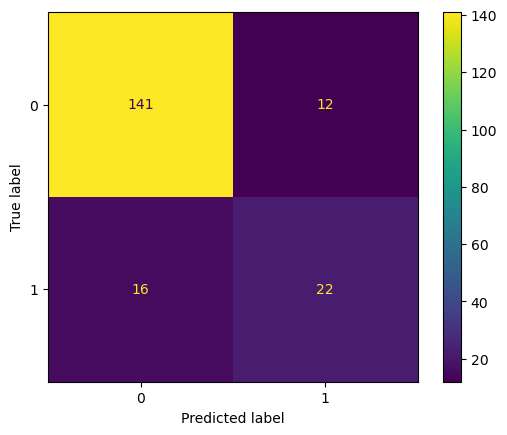

In [119]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [67]:
# Why our model is working Well ? the answer is The data is imbalanced, so lets make it balanced by using techniques called oversampling and undersampling.

In [68]:
# In this is problem Our dataset is low, so we can use the Oversampling method to deal with the imbalace data.

In [70]:
from imblearn.combine import SMOTEENN 
sm = SMOTEENN() # using SMOTE.

In [71]:
Xs, ys = sm.fit_resample(X,y)

In [80]:
Xs_train, Xs_test, ys_train,ys_test = tts(Xs,ys,test_size= 0.2, random_state= 42)

In [81]:
Xs_train.head()

,Age,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,FrequentFlyer_No,FrequentFlyer_No Record,FrequentFlyer_Yes,AnnualIncomeClass_High Income,AnnualIncomeClass_Low Income,AnnualIncomeClass_Middle Income
809,33,2,1,0,0,0,0,0,1,0
707,36,2,1,0,1,0,0,0,1,0
1062,36,6,0,1,0,0,1,1,0,0
660,27,1,0,0,0,0,1,1,0,0
976,27,2,0,0,1,0,0,0,1,0


In [82]:
Xs_train.shape

(904, 10)

In [83]:
Xs_test.shape

(226, 10)

In [84]:
ys_train.head()

809     1
707     1
1062    1
660     1
976     1
Name: Target, dtype: int64

In [85]:
ys_train.shape

(904,)

In [86]:
ys_test.shape

(226,)

In [87]:
# Model

In [88]:
from sklearn.linear_model import LogisticRegression
lgs = LogisticRegression()

In [111]:
lgs.fit(Xs_train, ys_train)

LogisticRegression()

In [112]:
ys_pred1 = lgs.predict(Xs_test)

In [113]:
lgs.score(Xs_test,ys_pred1)

1.0

In [114]:
print(classification_report(ys_test, ys_pred1))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       125
           1       0.73      0.71      0.72       101

    accuracy                           0.75       226
   macro avg       0.75      0.75      0.75       226
weighted avg       0.75      0.75      0.75       226



In [116]:
print(confusion_matrix(ys_test, ys_pred1))

[[98 27]
 [29 72]]


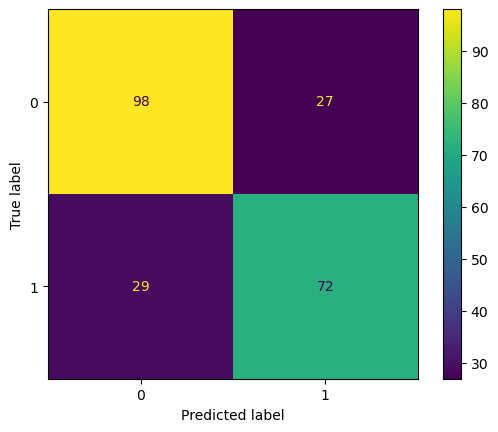

In [120]:
confusion_matrix = metrics.confusion_matrix(ys_test, ys_pred1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [121]:
# Still Our Model is not Performing Better lets see another models.

In [123]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 42 ,max_depth= 7, min_samples_leaf=8)

In [124]:
dtc.fit(Xs_train,ys_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=8, random_state=42)

In [125]:
ys_pred2 = dtc.predict(Xs_test)

In [126]:
dtc.score(Xs_test,ys_pred2)

1.0

In [127]:
print(classification_report(ys_test, ys_pred2))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       125
           1       0.96      0.94      0.95       101

    accuracy                           0.96       226
   macro avg       0.96      0.95      0.96       226
weighted avg       0.96      0.96      0.96       226



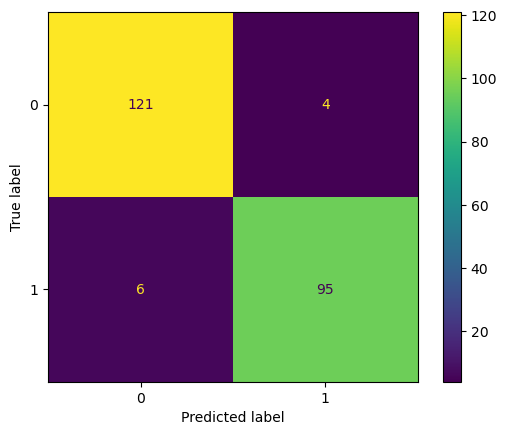

In [128]:
confusion_matrix = metrics.confusion_matrix(ys_test, ys_pred2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [129]:
# Our model is performing Very Well Having precision - 96, Recall - 94 and Accuracy - 96 

## Saving the Model.

In [131]:
import pickle

In [132]:
pickle.dump(lgs, open('churn_predictor.pkl', 'wb'))